In [61]:
### Importing necessary libraries
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Accessing Data

In [62]:
### Loading matlab files in Python using Scipy.io
import scipy.io
mat = scipy.io.loadmat('Brain.mat')

In [63]:
T1, label = mat['T1'], mat['label']


In [64]:
data_folder = 'data'
os.makedirs('data',exist_ok=True)

In [65]:
for i in range(10):
    img = T1[:,:,i]
    img = ((img - img.min()) * (1/(img.max() - img.min()) * 255)).astype('uint8')
    ###source: https://stackoverflow.com/a/49922520/9605907
    lab = label[:,:,i]
    lab = ((lab - lab.min()) * (1/(lab.max() - lab.min()) * 255)).astype('uint8')
    cv2.imwrite(os.path.join(data_folder,f'{i}_image.jpg'),img)
    cv2.imwrite(os.path.join(data_folder,f'{i}_gt.jpg'),lab)

In [66]:
sorted(os.listdir(data_folder))

['0_gt.jpg',
 '0_image.jpg',
 '1_gt.jpg',
 '1_image.jpg',
 '2_gt.jpg',
 '2_image.jpg',
 '3_gt.jpg',
 '3_image.jpg',
 '4_gt.jpg',
 '4_image.jpg',
 '5_gt.jpg',
 '5_image.jpg',
 '6_gt.jpg',
 '6_image.jpg',
 '7_gt.jpg',
 '7_image.jpg',
 '8_gt.jpg',
 '8_image.jpg',
 '9_gt.jpg',
 '9_image.jpg']

# Visualizing sample data

In [76]:
### function to plot image
def show_image(image,cmap = 'gray',fig_size = 10):
    plt.figure(figsize = (fig_size,fig_size))
    fig  = plt.imshow(image,cmap = cmap)
    plt.show()


### input image

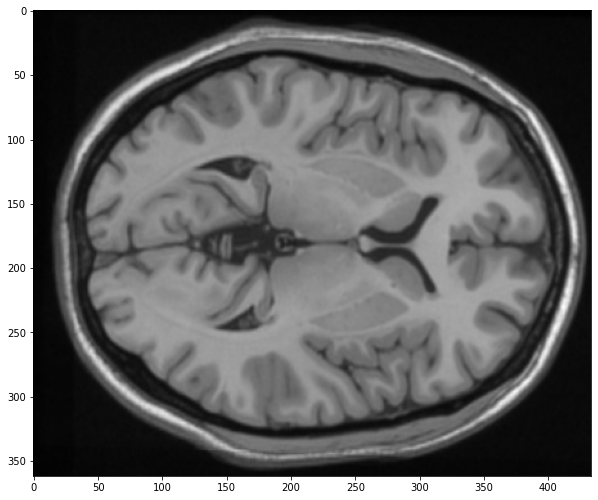

In [77]:

input_image = cv2.imread(os.path.join(data_folder,'0_image.jpg'))
show_image(input_image)

### Expected segmented image

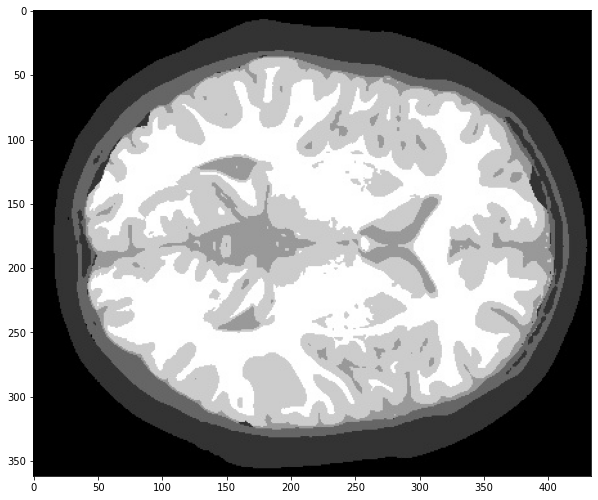

In [78]:

label_image = cv2.imread(os.path.join(data_folder,'0_gt.jpg'))
show_image(label_image)

-  From the given set of images, we need to arrive at a segmentation algorithm that can segment the given input into the following labels:

    • Label 0 = air 
    • Label 1 = skin/scalp 
    • Label 2 = skull 
    • Label 3 = CSF 
    • Label 4 = Gray Matter 
    • Label 5 = White Matter 

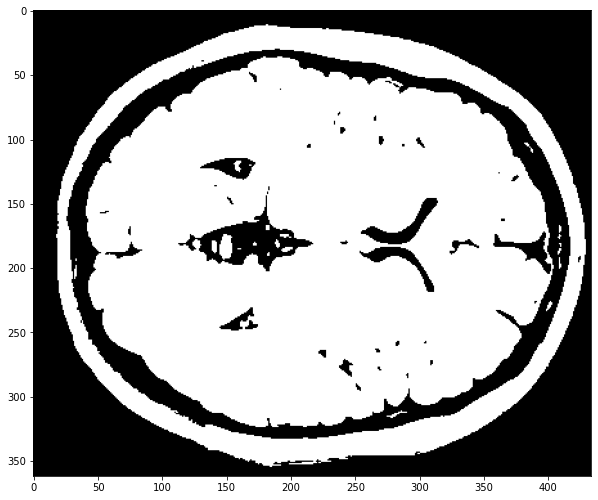

In [86]:
#### basic Thresholding

th, dst = cv2.threshold(input_image, 70, 255, cv2.THRESH_BINARY)
show_image(dst)